# Importing Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.core.interchange.dataframe_protocol import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


# Importing the dataset as DataFrame and Data exploration 

In [4]:
df = pd.read_csv("thyroidDF.csv")

In [5]:
df.head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
5,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803048
6,77,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,21.0,other,-,840803068
7,28,F,f,f,f,f,f,f,f,f,...,116.0,f,NaN,f,NaN,f,NaN,SVI,-,840807019
8,28,F,f,f,f,f,f,f,f,f,...,76.0,f,NaN,f,NaN,f,NaN,other,-,840808060
9,28,F,f,f,f,f,f,f,f,f,...,83.0,f,NaN,f,NaN,f,NaN,other,-,840808073


In [6]:
# Total number of rows and columns
row, columns = df.shape
print(f'Total number of rows: {row}')
print(f'Total number of columns: {columns}')

Total number of rows: 9172
Total number of columns: 31


In [7]:
# Total number of duplicate rows
df.duplicated().sum()

0

In [8]:
# Total number of missing values in each column
df.isna().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

The “Thyroid Disease Data” UCI Machine Learning dataset contains 9,172 rows and 31 columns, with no duplicate values. However, there are significant number of missing values in the columns: Sex, TSH, T3, TT4, T4U, FTI, and TBG, with TBG column leading with 8823 null entries. 

In [10]:
# Unique values in 'sex' column
df['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [11]:
# Counting the frequency of each distinct value in the 'sex' column
df['sex'].value_counts()

sex
F    6073
M    2792
Name: count, dtype: int64

In [12]:
# Unique values in 'TSH_measured' column
df['TSH_measured'].unique()

array(['t', 'f'], dtype=object)

In [13]:
# Filtering the unique values in the 'TSH' column for rows where 'TSH_measured' is not measured to find the erroneous data. 
df['TSH'][df['TSH_measured'] == 'f'].unique()

array([nan])

In [14]:
# Counting the number of missing TSH values for patients where TSH was not measured
df['TSH'][df['TSH_measured'] == 'f'].isnull().sum()

842

In [15]:
# Counting of missing values in TSH
df['TSH'].isnull().sum()

842

The dataset has no erroneous data related to the TSH measurements. The data marked with 'f' in 'TSH_measured' has no corresponding values in 'TSH' column which is correct. 

In [17]:
# Unique values in 'T3_measured' column
df['T3_measured'].unique()

array(['f', 't'], dtype=object)

In [18]:
# Filtering the unique values in the 'T3' column for rows where 'T3_measured' is 'f' to validate the data. 
df['T3'][df['T3_measured'] == 'f'].unique()

array([nan])

In [19]:
# Counting the number of missing T3 values for patients where T3 was not measured
df['T3'][df['T3_measured'] == 'f'].isnull().sum()

2604

In [20]:
# Counting of missing values in T3
df['T3'].isnull().sum()

2604

Similarly, the dataset has no erroneous data related to the T3 measurements. The data marked with 'f' in 'T3_measured' has no corresponding values in 'T3' column which is correct. 

In [22]:
# Unique values in 'TT4_measured' column
df['TT4_measured'].unique()

array(['f', 't'], dtype=object)

In [23]:
# Filtering distinct values in the 'TT4' column for rows where 'TT4_measured' is 'f' 
df['TT4'][df['TT4_measured'] == 'f'].unique()

array([nan])

In [24]:
# Counts the number of missing TT4 values for patients where TT4 was not measured
df['TT4'][df['TT4_measured'] == 'f'].isnull().sum()

442

In [25]:
# Count of missing values in TT4
df['TT4'].isnull().sum()

442

Similarly, the dataset has no erroneous data related to the TT4 measurements. The data marked with 'f' in 'TT4_measured' has no corresponding values in 'TT4' column which is correct. 

In [27]:
# Unique values in 'T4U_measured' column
df['T4U_measured'].unique()

array(['f', 't'], dtype=object)

In [28]:
# Filtering the unique values 'T4U' column for rows where 'T4U_measured' is 'f'
df['T4U'][df['T4U_measured'] == 'f'].unique()

array([nan])

In [29]:
# Counting the number of missing T4U values for patients where T4U was not measured
df['T4U'][df['T4U_measured'] == 'f'].isnull().sum()

809

In [30]:
# Counting of missing values in T4U
df['T4U'].isnull().sum()

809

Similarly, the dataset has no erroneous data related to the T4U measurements. The data marked with 'f' in 'T4U_measured' has no corresponding values in 'T4U' column which is correct. 

In [32]:
# Unique values in 'FTI_measured' column
df['FTI_measured'].unique()

array(['f', 't'], dtype=object)

In [33]:
# Extracting the unique values in the 'FTI' column for rows where 'FTI_measured' is 'f'
df['FTI'][df['FTI_measured'] == 'f'].unique()

array([nan])

In [34]:
# Counting the number of missing FTI values for patients where FTI was not measured
df['FTI'][df['FTI_measured'] == 'f'].isnull().sum()

802

In [35]:
# Counting of missing values in FTI
df['FTI'].isnull().sum()

802

Similarly, the dataset has no erroneous data related to the FTI measurements. The data marked with 'f' in 'FTI_measured' has no corresponding values in 'FTI' column which is correct. 

In [37]:
# Unique values in 'TBG_measured' column
df['TBG_measured'].unique()

array(['f', 't'], dtype=object)

In [38]:
# Filtering the distinct values in the 'TBG' column for rows where 'TBG_measured' is 'f'
df['TBG'][df['TBG_measured'] == 'f'].unique()

array([nan])

In [39]:
# Counting the number of missing TBG values for patients where TBG was not measured
df['TBG'][df['TBG_measured'] == 'f'].isnull().sum()

8823

In [40]:
# Counting of missing values in TBG
df['TBG'].isnull().sum()

8823

Similarly, the dataset has no erroneous data related to the TBG measurements. The data marked with 'f' in 'TBG_measured' has no corresponding values in 'FBG' column which is correct. 

**Conclusion:** 

Based on analysis, the dataset has no error entries in TSH, T3, TT4, T4U, FTI, and TBG measurements as null values in the TSH, T3, TT4, T4U, FTI, and TBG columns has corresponding TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured, and TBG_measured values with the 'f' values. For the patients where the test were not taken, there is no measured value or data. 

# Feature Engineering

In [44]:
# Unique classes in 'target' column
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

**Diagnosis**

The diagnosis data can be categorized into 8 large classes: 

1. Hyperthyroid conditions: A-hyperthyroid, B - T3 toxic, C - toxic goitre, D - secondary toxic
2. Hypothyroid conditions:  E - hypothyroid, F - primary hypothyroid, G - compensated hypothyroid, H - secondary hypothyroid
3. Binding Protein: I - Increased binding protein, J - Decreased binding protein
4. General health condition: K - Concurrent non-thyroidal illness
5. Replacement Therapy: L - Consistent with replacement therapy, M - Underreplaced, N - Overreplaced
6. Antithyroid Treatment: O - Antithyroid drugs, P - I131 treatment, Q - Surgery
7. Miscellaneous: R - Discordant assay results, S - Elevated TBG, T - Elevated thyroid hormones
8. Normal condition: '-' (without disease)

The diagnosis in the form of  "X|Y" is interpreted as "consistent with X, but more likely Y". 




In [46]:
# Defining  diagnosis groups 

hyperthyroid_conditions = ['A', 'B', 'C', 'D']  #Hyperthyroid
hypothyroid_conditions = ['E', 'F', 'G', 'H'] #Hypothyroid
replacement_therapy = ['L', 'M', 'N'] #Related to synthetic hormone use
binding_protein = ['I', 'J'] #TBG-related problems
non_thyroidal_illness = ['K', 'R', 'S', 'T']	#Indirect or related issues
treatment_effects = ['O', 'P', 'Q'] #Due to the interventions
normal_conditions = ['-'] #Negative

# Mapping logic
def categorize_target(value):
    diagnoses = value.split('|')
    
    for diagnosis in diagnoses:
        if diagnosis in hyperthyroid_conditions:
            return 'Hyperthyroid'
        if diagnosis in hypothyroid_conditions:
            return 'Hypothyroid'
        if diagnosis in replacement_therapy:
            return 'Replacement Therapy'
        if diagnosis in binding_protein:
            return 'Binding Protein'
        if diagnosis in non_thyroidal_illness:
            return 'Non-thyroidal Illness'
        if diagnosis in treatment_effects:
            return 'Treatment Effect'
        if diagnosis in normal_conditions:
            return 'Negative'
    
# Apply the categorization to DataFrame
df['target'] = df['target'].apply(categorize_target)

In [47]:
#Unique Classes in 'target' column
df['target'].unique()

array(['Negative', 'Non-thyroidal Illness', 'Hypothyroid', None,
       'Binding Protein', 'Replacement Therapy', 'Hyperthyroid',
       'Treatment Effect'], dtype=object)

In [48]:
#  Counting the frequency of each unique classes in the 'target' column
df['target'].value_counts()

target
Negative                 6771
Non-thyroidal Illness     717
Hypothyroid               601
Binding Protein           376
Replacement Therapy       336
Hyperthyroid              195
Treatment Effect           33
Name: count, dtype: int64

This means that the dataset is highly imbalanced and this issue will be addressed in further steps

In [50]:
# Counting the missing values in 'target' column
df['target'].isnull().sum()

143

## Data Cleaning
The missing values were handled using appropriate imputation method: 

1. Columns with missed 'target' value were dropped. 
2. Missing values in the 'Sex' column were imputed using the mode of the column.
3. Missing values in TSH, T3, TT4, T4U were imputed with the median of the respective columns.
4. The TBG column was dropped entirely due a notable number of null entries in it, particularly, 8823 null values.

Additionaly 
FTI were dropped


In [52]:
df = df.dropna(subset=['target'])

In [53]:
# Imputing the missing values in 'sex' column with mode which is 'F' - Female 
sex_mode = df['sex'].mode()[0]
sex_mode

'F'

In [54]:
df['sex'] = df['sex'].fillna(sex_mode)
df['sex'].isna().sum()

0

In [55]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

Additional to the 'TBG' column, the columns TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id' were dropped as they do not contribute to the analysis and prediction. 

In [57]:
# List of columns that were dropped
col_to_drop = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source',
        'TBG']

In [58]:
# Dropping the columns in the 'col_to_drop' list 
df.drop(col_to_drop, axis = 1, inplace = True)

In [59]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'target'],
      dtype='object')

In [60]:
# List of columns still containing missing values
col_with_null = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [61]:
# Correlating the columns in 'col_with_null' to find the suitable imputation method and finding if the column should be kept  
correlation_matrix = df[col_with_null].corr()
print(correlation_matrix)

          TSH        T3       TT4       T4U       FTI
TSH  1.000000 -0.153425 -0.275152  0.077594 -0.275518
T3  -0.153425  1.000000  0.557632  0.333870  0.387316
TT4 -0.275152  0.557632  1.000000  0.373304  0.750770
T4U  0.077594  0.333870  0.373304  1.000000 -0.233350
FTI -0.275518  0.387316  0.750770 -0.233350  1.000000


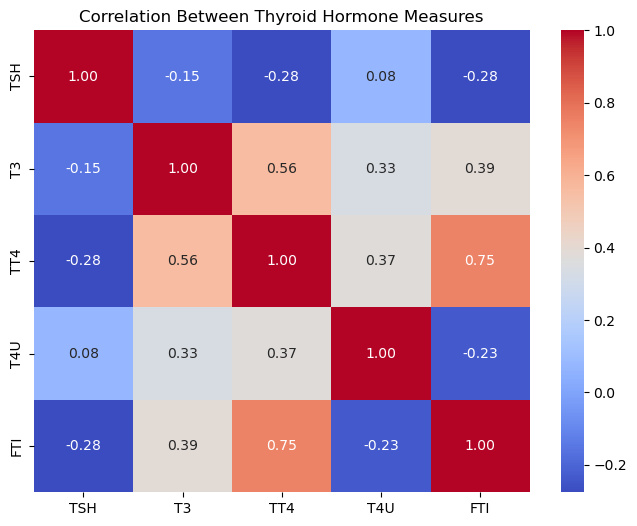

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Thyroid Hormone Measures')
plt.show()


Based on correlation matrix, we found that there are strong correlations between 'TT4' and 'FTI' columns (75%), and moderate correlation between the columns 'T3' and 'TT4' (56%) , 'TT4' and 'T4U' (37%), 'T3' and 'FTI' (39%) columns. 

Columns that have weak/moderate correlation with other columns are TSH, T3, T4U, these columns should be kept in. 

Columns 'TT4' and 'FTI' have strong correlation score of 75%. In most cases, FTI is calculated from devision of TT4 by T4U, therefore, the column 'FTI' is dependent column, it can be dropped. 


In [64]:
df.drop('FTI' , axis = 1, inplace = True)

In [65]:
df.isna().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     840
T3                     2603
TT4                     442
T4U                     806
target                    0
dtype: int64

In [66]:
# Unique values in the columns with 'object' data type
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'Unique values in {i}: {df[i].unique()}')

Unique values in sex: ['F' 'M']
Unique values in on_thyroxine: ['f' 't']
Unique values in query_on_thyroxine: ['f' 't']
Unique values in on_antithyroid_meds: ['f' 't']
Unique values in sick: ['f' 't']
Unique values in pregnant: ['f' 't']
Unique values in thyroid_surgery: ['f' 't']
Unique values in I131_treatment: ['f' 't']
Unique values in query_hypothyroid: ['t' 'f']
Unique values in query_hyperthyroid: ['f' 't']
Unique values in lithium: ['f' 't']
Unique values in goitre: ['f' 't']
Unique values in tumor: ['f' 't']
Unique values in hypopituitary: ['f' 't']
Unique values in psych: ['f' 't']
Unique values in target: ['Negative' 'Non-thyroidal Illness' 'Hypothyroid' 'Binding Protein'
 'Replacement Therapy' 'Hyperthyroid' 'Treatment Effect']


In [67]:
#Shape of df
df.shape

(9029, 21)

In [68]:
#Unique values in 'age' column
df['age'].unique()

array([   29,    41,    36,    32,    60,    77,    28,    54,    42,
          51,    37,    16,    43,    63,    40,    56,    85,    71,
          67,    55,    61,    46,    44,    82,    64,    70,    33,
          59,    53,    52,    49,    35,    48,    27,    69,    76,
          73,    68,    66,    30,    88,    38,    58,    21,    45,
          83,    62,    25,    86,    75,    72,    14,    15,    39,
          26,    20,    80,    90,    23,    18,    13,    78,    24,
          81,    92,    57,    74,     9,    47,    17,    11,    50,
          34,     8,    79,    31,    65,    84,    12,    10,    19,
          22,     1,     2,    97,     6,    89,    87,   455,    93,
           7,    91,     5,    94,     4, 65511,    95, 65512,     3,
       65526])

There are some discrepencies in the 'age' column. It is containing values like 455, 65511, 65512, and 65526 which indicates to the inconsistent data points.

In [70]:
# Filtering the values in 'age' column 
df = df[df['age'] <= 100]

# Unique values in 'age' column
df['age'].unique()

array([29, 41, 36, 32, 60, 77, 28, 54, 42, 51, 37, 16, 43, 63, 40, 56, 85,
       71, 67, 55, 61, 46, 44, 82, 64, 70, 33, 59, 53, 52, 49, 35, 48, 27,
       69, 76, 73, 68, 66, 30, 88, 38, 58, 21, 45, 83, 62, 25, 86, 75, 72,
       14, 15, 39, 26, 20, 80, 90, 23, 18, 13, 78, 24, 81, 92, 57, 74,  9,
       47, 17, 11, 50, 34,  8, 79, 31, 65, 84, 12, 10, 19, 22,  1,  2, 97,
        6, 89, 87, 93,  7, 91,  5, 94,  4, 95,  3])

In [71]:
df.shape

(9025, 21)

In [72]:
# Checking whether data has any anomalies where patient is male but have 'true' in 'pregnant' column
df[(df['sex']=='Male') & (df['pregnant'] == 't')]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,target


There are no instances in the dataset where a "Male" is marked as "pregnant." This is a logical result and validates the integrity of the data for this specific condition. In such cases, we can infer that:

* The dataset does not contain biologically implausible entries for this scenario.
* The data aligns with expected real-world constraints (assuming there are no labeling or data entry errors).

In [74]:
# Creating a copy of 'df' without any null values for data visualization
df1 = df.copy()

# Data Split

Splitting the dataset with stratification as the dataset is highly imbalanced 

In [77]:
X = df.drop('target', axis=1)
y = df['target']

# Step 2: Train+Val vs Test (85% / 15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

# Step 3: Train vs Val (from 85%, split ~70:15 original ratio)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=42
)

# Output shapes
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (6320, 20), Validation: (1351, 20), Test: (1354, 20)


Class counts per split:
 Class       Binding Protein  Hyperthyroid  Hypothyroid  Negative  \
Split                                                              
Test                     57            29           90      1015   
Train                   263           137          421      4739   
Validation               56            29           90      1013   

Class       Non-thyroidal Illness  Replacement Therapy  Treatment Effect  
Split                                                                     
Test                          108                   50                 5  
Train                         502                  235                23  
Validation                    107                   51                 5  


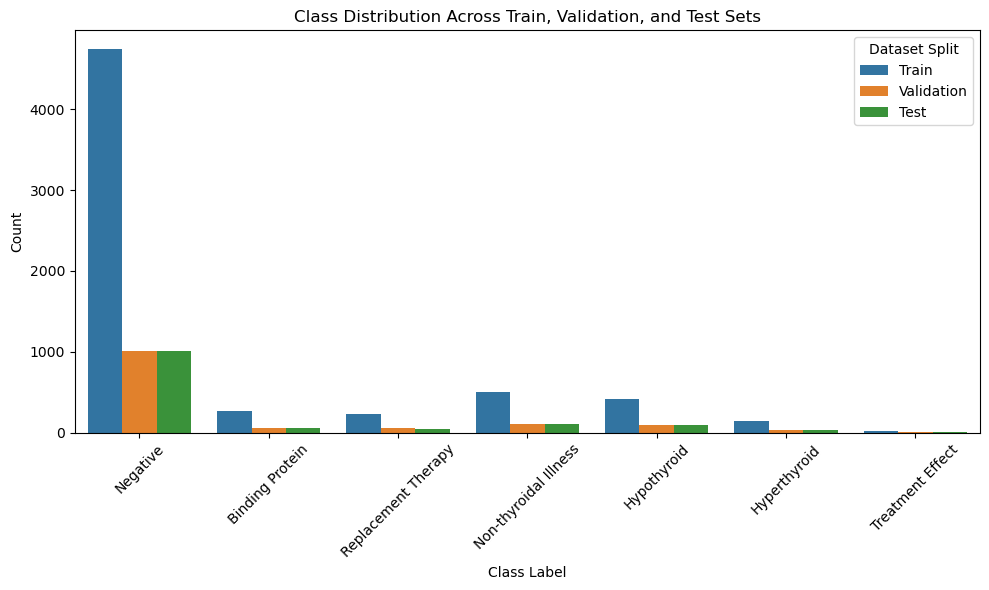

In [78]:
# Combine the target data (y_train, y_val, y_test) into a single DataFrame with their respective splits
split_labels = ['Train'] * len(y_train) + ['Validation'] * len(y_val) + ['Test'] * len(y_test)
combined_y = pd.concat([y_train, y_val, y_test], axis=0).reset_index(drop=True)
split_df = pd.DataFrame({'Split': split_labels, 'Class': combined_y})

# Calculate and print the class counts for each split
class_counts = split_df.groupby(['Split', 'Class']).size().unstack(fill_value=0)
print("Class counts per split:\n", class_counts)

# Plot the class distribution per split
plt.figure(figsize=(10, 6))
sns.countplot(data=split_df, x='Class', hue='Split')
plt.title('Class Distribution Across Train, Validation, and Test Sets')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.legend(title='Dataset Split')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Data imputing 

Adding data imputation to handle missing values in 'TSH', 'T3', 'TT4', 'T4U' columns. We are adding median values instead missed values. 
The imputation is being added into Train set, then validation and test sets were transformed for consistency.

In [81]:
# Impute missing values for numerical columns (TSH, T3, TT4, T4U)
num_cols = ['TSH', 'T3', 'TT4', 'T4U']

imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the training data, then transform on test and validation
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = imputer.transform(X_val[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

# Output the shapes to verify
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (6320, 20), Validation: (1351, 20), Test: (1354, 20)


# Data encoding 

In [83]:
# Check the unique data types for each column
print(df.dtypes)

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH                    float64
T3                     float64
TT4                    float64
T4U                    float64
target                  object
dtype: object


In [84]:
# Check the unique values for each categorical column
for col in df.columns:
    if df[col].dtype == 'object':  # For categorical columns
        print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'sex': ['F' 'M']
Unique values in 'on_thyroxine': ['f' 't']
Unique values in 'query_on_thyroxine': ['f' 't']
Unique values in 'on_antithyroid_meds': ['f' 't']
Unique values in 'sick': ['f' 't']
Unique values in 'pregnant': ['f' 't']
Unique values in 'thyroid_surgery': ['f' 't']
Unique values in 'I131_treatment': ['f' 't']
Unique values in 'query_hypothyroid': ['t' 'f']
Unique values in 'query_hyperthyroid': ['f' 't']
Unique values in 'lithium': ['f' 't']
Unique values in 'goitre': ['f' 't']
Unique values in 'tumor': ['f' 't']
Unique values in 'hypopituitary': ['f' 't']
Unique values in 'psych': ['f' 't']
Unique values in 'target': ['Negative' 'Non-thyroidal Illness' 'Hypothyroid' 'Binding Protein'
 'Replacement Therapy' 'Hyperthyroid' 'Treatment Effect']


1. Label encoding for binary values in columns 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych'.
3. Label Encoding for the target variable

In [86]:
# Define LabelEncoder
le = LabelEncoder()

# Binary categorical columns
binary_cols = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick',
               'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid',
               'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']

# Apply Label Encoding for binary columns
for col in binary_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])  # Ensure no data leakage from the validation set
    X_test[col] = le.transform(X_test[col])
    
# Ensure consistent column alignment across all sets
# Align columns by adding missing columns in validation/test if needed (from train set)
# After encoding binary columns
X_val_aligned, _ = X_val.align(X_train, join='left', axis=1, fill_value=0)
X_test_aligned, _ = X_test.align(X_train, join='left', axis=1, fill_value=0)

X_val = X_val_aligned
X_test = X_test_aligned

# Check the shapes after encoding
print(f"Train X shape: {X_train.shape}")
print(f"Validation X shape: {X_val.shape}")
print(f"Test X shape: {X_test.shape}")

# Encode the target variable (y)
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)  # Use transform to avoid data leakage
y_test = le.transform(y_test)

# Check the shapes after encoding
print(f"Train y shape: {y_train.shape}")
print(f"Validation y shape: {y_val.shape}")
print(f"Test y shape: {y_test.shape}")

Train X shape: (6320, 20)
Validation X shape: (1351, 20)
Test X shape: (1354, 20)
Train y shape: (6320,)
Validation y shape: (1351,)
Test y shape: (1354,)


# Data scaling 

Numeric columns in the dataset: ['age', 'TSH', 'T3', 'TT4', 'T4U']

In [89]:
print(X_train[['age', 'TSH', 'T3', 'TT4', 'T4U']].describe())

              age          TSH           T3          TT4          T4U
count  6320.00000  6320.000000  6320.000000  6320.000000  6320.000000
mean     51.98038     4.436744     1.965611   108.291361     0.975215
std      18.86952    19.193283     0.770075    36.105811     0.192839
min       1.00000     0.005000     0.050000     2.000000     0.170000
25%      37.00000     0.600000     1.700000    89.000000     0.870000
50%      55.00000     1.400000     1.900000   104.000000     0.960000
75%      67.00000     2.500000     2.200000   123.000000     1.050000
max      97.00000   500.000000    18.000000   450.000000     2.330000


Scaling is necessary in all columns as they have widely different scales. 

In [91]:
# Features to scale
scale_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U']

# Initialize scaler
scaler = StandardScaler()

# Fit on training only (to prevent data leakage), transform all
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_val[scale_cols] = scaler.transform(X_val[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])
# Check the shapes after scaling
print(f"Train X shape: {X_train.shape}")
print(f"Validation X shape: {X_val.shape}")
print(f"Test X shape: {X_test.shape}")
# Check the shapes after scaling
print(f"Train y shape: {y_train.shape}")
print(f"Validation y shape: {y_val.shape}")
print(f"Test y shape: {y_test.shape}")

Train X shape: (6320, 20)
Validation X shape: (1351, 20)
Test X shape: (1354, 20)
Train y shape: (6320,)
Validation y shape: (1351,)
Test y shape: (1354,)


In [92]:
print(X_train[['age', 'TSH', 'T3', 'TT4', 'T4U']].describe())

                age           TSH            T3           TT4           T4U
count  6.320000e+03  6.320000e+03  6.320000e+03  6.320000e+03  6.320000e+03
mean  -1.585230e-16 -1.461559e-17  3.271645e-16  4.497106e-18 -5.092972e-16
std    1.000079e+00  1.000079e+00  1.000079e+00  1.000079e+00  1.000079e+00
min   -2.701945e+00 -2.309191e-01 -2.487761e+00 -2.944118e+00 -4.175924e+00
25%   -7.939558e-01 -1.999162e-01 -3.449428e-01 -5.343430e-01 -5.456561e-01
50%    1.600390e-01 -1.582316e-01 -8.520723e-02 -1.188645e-01 -7.890744e-02
75%    7.960355e-01 -1.009154e-01  3.043961e-01  4.074082e-01  3.878412e-01
max    2.386027e+00  2.582166e+01  2.082350e+01  9.464839e+00  7.026045e+00


Class distribution (%):
3    74.98
4     7.94
2     6.66
0     4.16
5     3.72
1     2.17
6     0.36
Name: proportion, dtype: float64


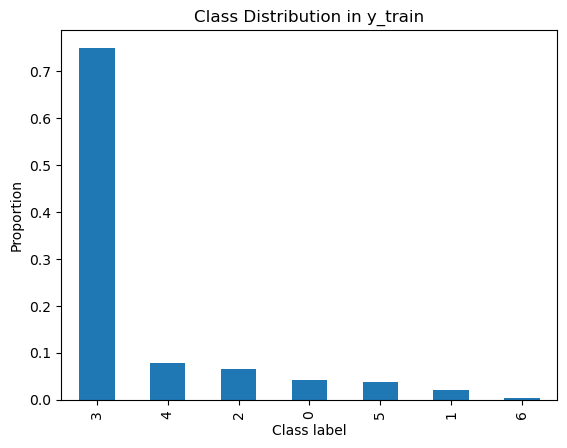

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_train is a Pandas Series or array
class_counts = pd.Series(y_train).value_counts(normalize=True)

print("Class distribution (%):")
print((class_counts * 100).round(2))

# Optional: Bar plot
class_counts.plot(kind='bar', title='Class Distribution in y_train')
plt.ylabel('Proportion')
plt.xlabel('Class label')
plt.show()


# Baseline models 

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Dictionary to store models and predictions
models = {}

# 1. Logistic Regression
models['Logistic Regression'] = LogisticRegression(
    max_iter=5000, multi_class='multinomial', class_weight='balanced', random_state=42)

# 2. Random Forest
models['Random Forest'] = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42)

# 3. XGBoost
models['XGBoost'] = xgb.XGBClassifier(
    use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 4. LightGBM
models['LightGBM'] = lgb.LGBMClassifier(
    class_weight='balanced', random_state=42)

# 5. CatBoost
models['CatBoost'] = CatBoostClassifier(
    verbose=0, random_state=42, auto_class_weights='Balanced')

# 6. Gradient Boosting
models['Gradient Boosting'] = GradientBoostingClassifier(
    random_state=42)

# 7. Decision Tree
models['Decision Tree'] = DecisionTreeClassifier(
    class_weight='balanced', random_state=42)

# 8. K-Nearest Neighbors
models['KNN'] = KNeighborsClassifier()

# 9. Gaussian Naive Bayes
models['Naive Bayes'] = GaussianNB()

# 10. Support Vector Machine
models['SVM'] = SVC(
    class_weight='balanced', probability=True, random_state=42)

# Fit and evaluate all models
for name, model in models.items():
    print(f"\n{name}")
    if name in ['KNN', 'Logistic Regression', 'SVM']:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        X_used = X_train
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        X_used = X_train

    print(classification_report(y_test, y_pred))
    #print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression
              precision    recall  f1-score   support

           0       0.33      0.72      0.46        57
           1       0.32      0.83      0.46        29
           2       0.81      0.89      0.85        90
           3       0.95      0.64      0.76      1015
           4       0.32      0.68      0.44       108
           5       0.38      0.96      0.54        50
           6       0.21      0.80      0.33         5

    accuracy                           0.68      1354
   macro avg       0.47      0.79      0.55      1354
weighted avg       0.82      0.68      0.71      1354

Confusion Matrix:
 [[ 41   5   0   8   1   1   1]
 [  1  24   0   1   3   0   0]
 [  2   0  80   0   2   2   4]
 [ 78  39  19 646 148  75  10]
 [  1   7   0  25  73   2   0]
 [  0   0   0   2   0  48   0]
 [  0   0   0   1   0   0   4]]

Random Forest


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.83      0.61      0.71        57
           1       0.76      0.66      0.70        29
           2       0.98      0.94      0.96        90
           3       0.93      0.96      0.94      1015
           4       0.71      0.67      0.69       108
           5       0.81      0.68      0.74        50
           6       0.67      0.40      0.50         5

    accuracy                           0.90      1354
   macro avg       0.81      0.70      0.75      1354
weighted avg       0.90      0.90      0.90      1354

Confusion Matrix:
 [[ 35   2   0  20   0   0   0]
 [  2  19   0   7   1   0   0]
 [  0   0  85   0   2   2   1]
 [  4   3   1 975  26   6   0]
 [  1   1   0  34  72   0   0]
 [  0   0   0  15   1  34   0]
 [  0   0   1   2   0   0   2]]

XGBoost


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:20:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.81      0.82      0.82        57
           1       0.81      0.72      0.76        29
           2       0.98      0.93      0.95        90
           3       0.94      0.98      0.96      1015
           4       0.76      0.63      0.69       108
           5       0.93      0.76      0.84        50
           6       0.67      0.40      0.50         5

    accuracy                           0.92      1354
   macro avg       0.84      0.75      0.79      1354
weighted avg       0.92      0.92      0.92      1354

Confusion Matrix:
 [[ 47   2   0   7   1   0   0]
 [  4  21   0   2   2   0   0]
 [  0   0  84   1   2   2   1]
 [  6   2   1 991  14   1   0]
 [  1   1   0  38  68   0   0]
 [  0   0   0  11   1  38   0]
 [  0   0   1   0   2   0   2]]

LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_row_wise=true` to remove the over

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.43      0.88      0.57        57
           1       0.41      0.72      0.53        29
           2       0.86      0.92      0.89        90
           3       0.97      0.77      0.86      1015
           4       0.44      0.69      0.54       108
           5       0.40      0.88      0.55        50
           6       0.75      0.60      0.67         5

    accuracy                           0.78      1354
   macro avg       0.61      0.78      0.66      1354
weighted avg       0.87      0.78      0.81      1354

Confusion Matrix:
 [[ 50   4   0   1   1   1   0]
 [  4  21   0   1   2   1   0]
 [  2   0  83   0   2   3   0]
 [ 56  14  12 784  90  58   1]
 [  3  10   0  18  75   2   0]
 [  2   2   0   1   1  44   0]
 [  0   0   1   0   1   0   3]]


Plotting feature importance for each model

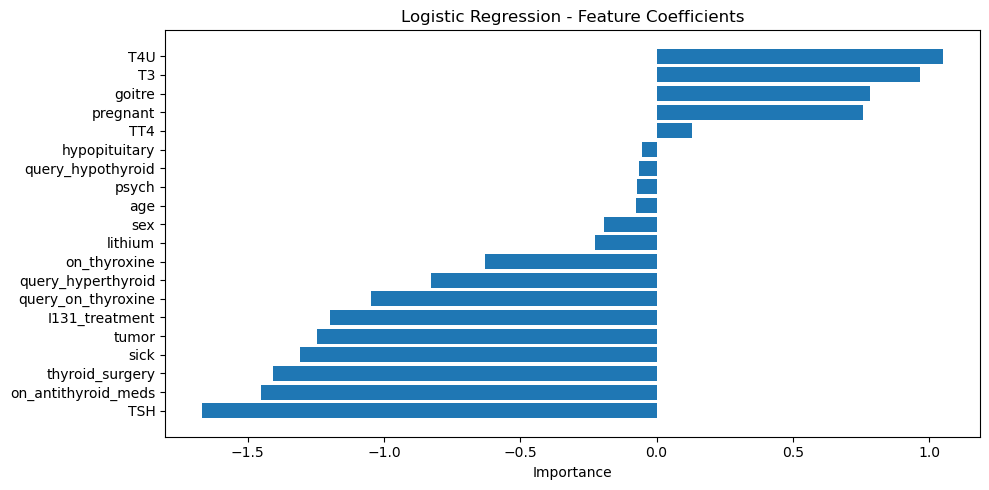

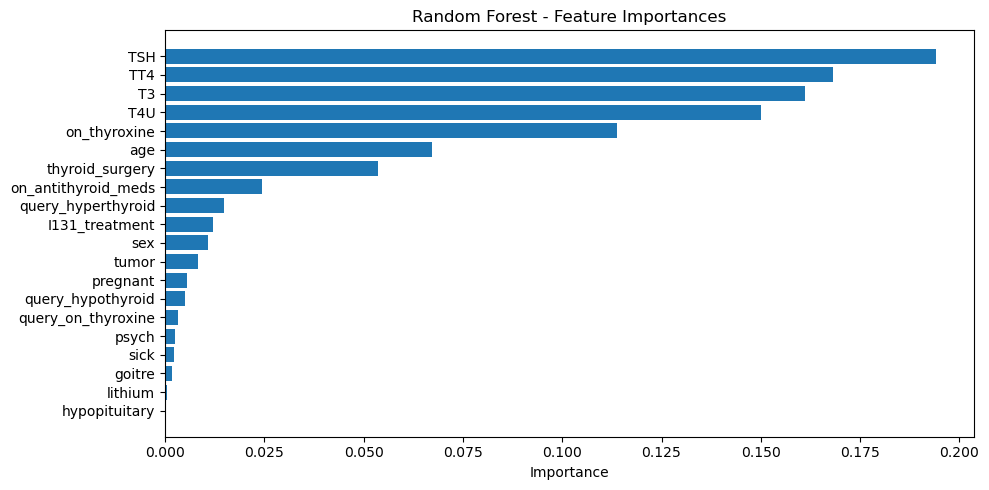

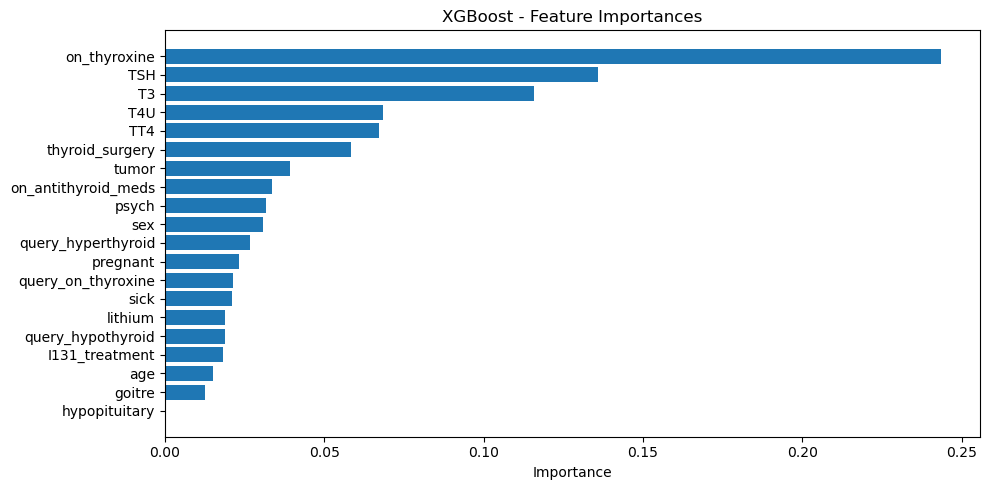

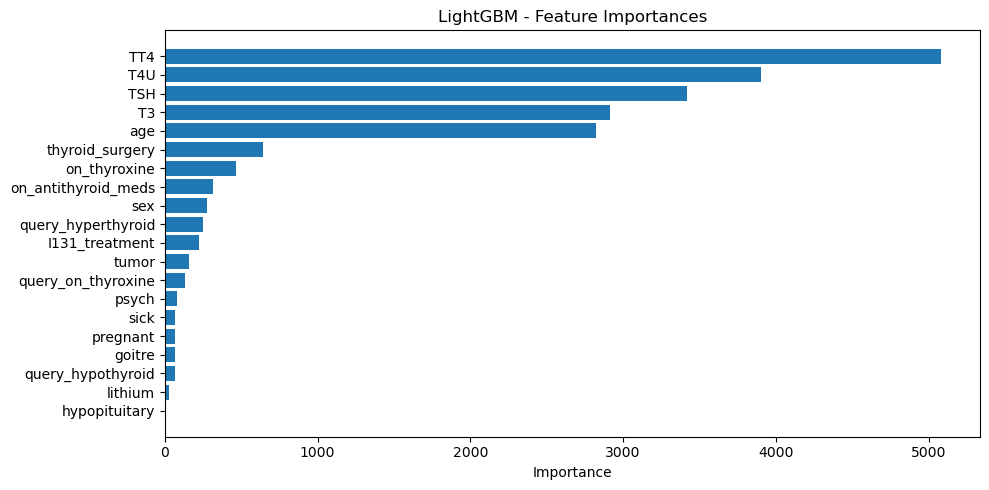

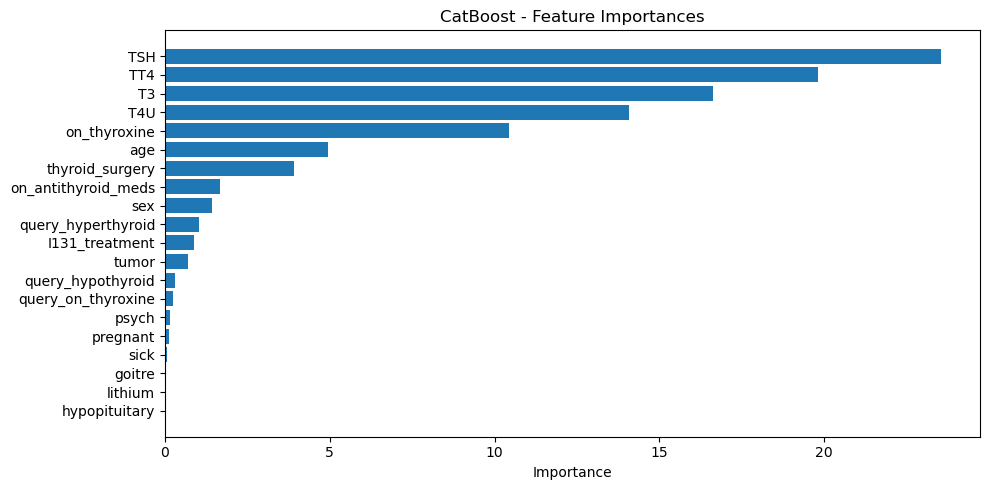

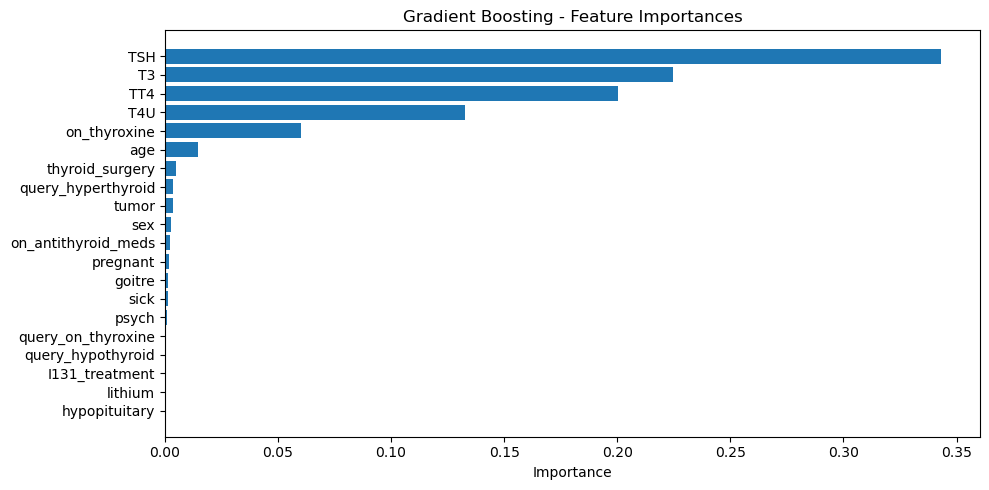

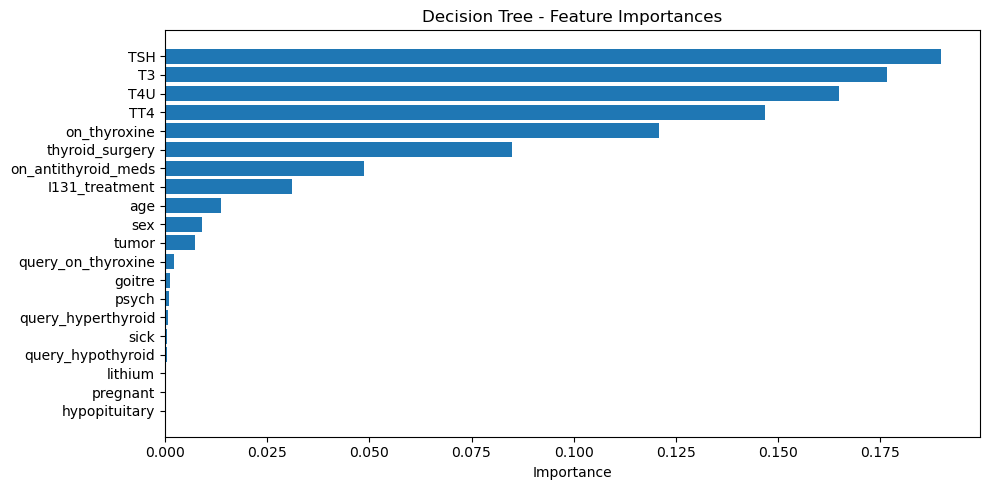

In [124]:
for name, model in models.items():
    try:
        if hasattr(model, "feature_importances_"):
            importances = model.feature_importances_
            title = "Feature Importances"
        elif hasattr(model, "coef_"):
            importances = model.coef_[0]  
            title = "Feature Coefficients"
        else:
            continue
    
        importance_df = pd.DataFrame({
            'feature': X.columns,
            'importance': importances
        }).sort_values(by='importance', ascending=False)
    
        plt.figure(figsize=(10, 5))
        plt.barh(importance_df['feature'], importance_df['importance'])
        plt.xlabel("Importance")
        plt.title(f"{name} - {title}")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Could not plot feature importance for {name}: {e}")


In [122]:
# Creating a function 'au_prc' to plot AU-PRC curve along with Average Precision for each class
def au_prc(y_test_data, y_score_data):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    from sklearn.preprocessing import label_binarize
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Binarize the labels for multi-class OvR
    classes = np.unique(y_test_data)
    y_true_binarized = label_binarize(y_test_data, classes=classes)
    
    # Store precision-recall metrics for each class
    precision_dict = {}
    recall_dict = {}
    average_precision_dict = {}
    
    for i, class_label in enumerate(classes):
        precision_dict[class_label], recall_dict[class_label], _ = precision_recall_curve(
            y_true_binarized[:, i], y_score_data[:, i]
        )
        average_precision_dict[class_label] = average_precision_score(
            y_true_binarized[:, i], y_score_data[:, i]
        )
    
    # Compute micro-average PR curve
    precision_micro, recall_micro, _ = precision_recall_curve(
        y_true_binarized.ravel(), y_score_data.ravel()
    )
    average_precision_micro = average_precision_score(y_true_binarized, y_score_data, average="micro")
    
    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    for class_label in classes:
        plt.plot(
            recall_dict[class_label], 
            precision_dict[class_label], 
            label=f"Class {class_label} (AP = {average_precision_dict[class_label]:.2f})"
        )
    
    # Add micro-average curve
    plt.plot(
        recall_micro, 
        precision_micro, 
        label=f"Micro-Average (AP = {average_precision_micro:.2f})", 
        color='gold', linestyle='--'
    )
    
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve for Multi-Class Classification")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


In [ ]:
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Data Modelling

## Logistic Regression

In [128]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare training and validation data
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([pd.Series(y_train), pd.Series(y_val)], axis=0)

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga', 'newton-cg'],  
    'penalty': ['l2']
}

# Set up Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the model
lr = LogisticRegression(max_iter=5000, random_state=42, class_weight='balanced')

# GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=cv, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Fit
grid_search.fit(X_train_val, y_train_val)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated f1_weighted:", grid_search.best_score_)

# Optional: evaluate on test set
y_pred_test = grid_search.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validated f1_weighted: 0.7138069145700234

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.34      0.74      0.47        57
           1       0.33      0.86      0.48        29
           2       0.81      0.92      0.86        90
           3       0.95      0.64      0.77      1015
           4       0.32      0.67      0.43       108
           5       0.41      0.96      0.57        50
           6       0.18      0.80      0.30         5

    accuracy                           0.68      1354
   macro avg       0.48      0.80      0.55      1354
weighted avg       0.83      0.68      0.72      1354



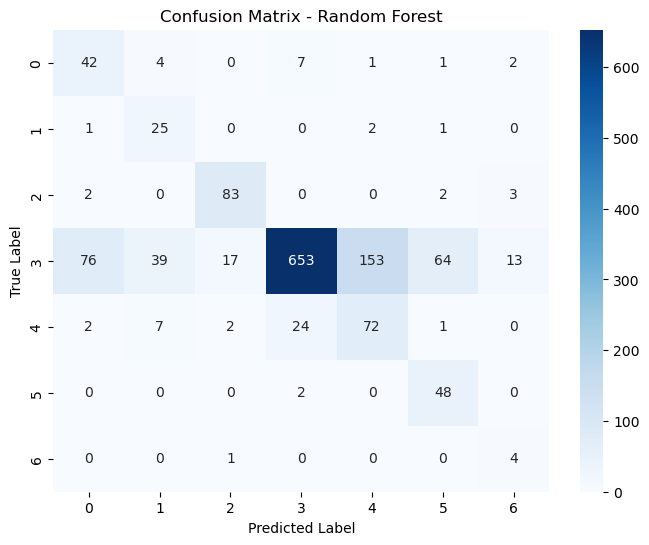

In [129]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Random Forest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

# Combine training and validation data
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([pd.Series(y_train), pd.Series(y_val)], axis=0)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

# Set up Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=cv, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_val, y_train_val)

# Best parameters and CV score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated f1_weighted:", grid_search.best_score_)

# Test set evaluation
y_pred_test = grid_search.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validated f1_weighted: 0.9090882475498345

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74        57
           1       0.72      0.79      0.75        29
           2       0.99      0.94      0.97        90
           3       0.96      0.95      0.95      1015
           4       0.68      0.80      0.74       108
           5       0.84      0.76      0.80        50
           6       0.50      0.40      0.44         5

    accuracy                           0.91      1354
   macro avg       0.78      0.77      0.77      1354
weighted avg       0.92      0.91      0.91      1354



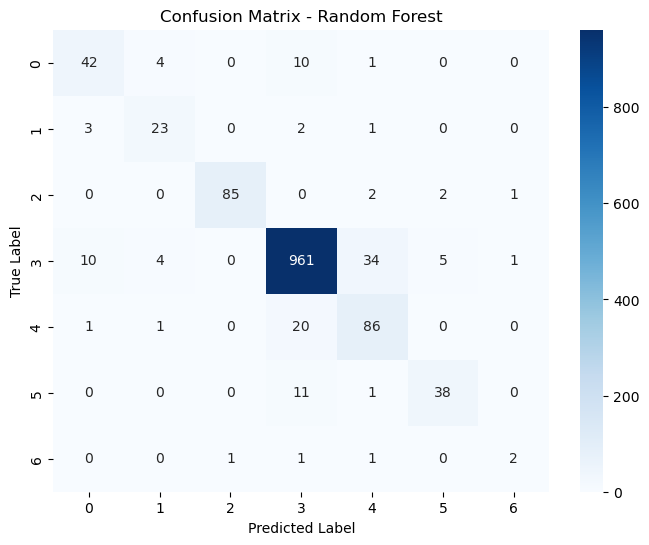

In [132]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## XGBoost Classifier

In [134]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

# Prepare training and validation data
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([pd.Series(y_train), pd.Series(y_val)], axis=0)

# Initialize classifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',  # for multi-class classification
    num_class=len(np.unique(y_train_val)),
    eval_metric='mlogloss',
    tree_method='hist',  # faster on large datasets
    random_state=42
)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_val, y_train_val)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated f1_weighted:", grid_search.best_score_)

# Test evaluation
y_pred_test = grid_search.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1}
Best Cross-Validated f1_weighted: 0.920598474977651

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        57
           1       0.75      0.72      0.74        29
           2       0.98      0.90      0.94        90
           3       0.95      0.98      0.96      1015
           4       0.78      0.69      0.74       108
           5       0.85      0.82      0.84        50
           6       0.33      0.40      0.36         5

    accuracy                           0.93      1354
   macro avg       0.79      0.76      0.77      1354
weighted avg       0.93      0.93      0.93      1354



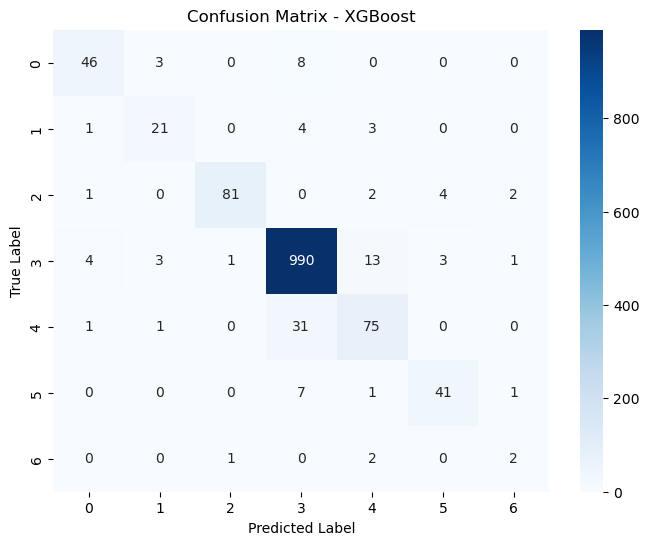

In [135]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

with smote 

In [137]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Step 1: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)

# Resample only the training set, not test/validation
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Step 2: Define the XGBoost model and hyperparameter grid
xgb_model = XGBClassifier(
    objective='multi:softmax',  # or 'multi:softprob' if you want probabilities
    eval_metric='mlogloss',
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [6, 10],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Step 3: Set up Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: GridSearchCV with weighted f1 score
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Step 5: Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Step 6: Results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated f1_weighted:", grid_search.best_score_)

# Step 7: Evaluate on test set
y_pred_test = grid_search.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))


Class distribution before SMOTE: Counter({3: 4739, 4: 502, 2: 421, 0: 263, 5: 235, 1: 137, 6: 23})
Class distribution after SMOTE: Counter({3: 4739, 0: 4739, 5: 4739, 4: 4739, 2: 4739, 1: 4739, 6: 4739})
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validated f1_weighted: 0.9818102351230855

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        57
           1       0.66      0.72      0.69        29
           2       0.98      0.88      0.92        90
           3       0.98      0.95      0.96      1015
           4       0.68      0.78      0.73       108
           5       0.79      0.90      0.84        50
           6       0.38      0.60      0.46         5

    accuracy                           0.92      1354
   macro avg       0.75      0.82   

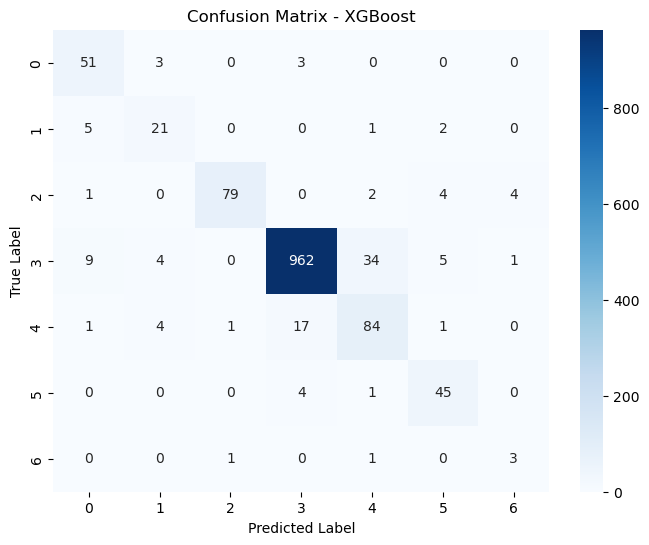

In [138]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

## LightGBM


In [140]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# LightGBM model
lgbm_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

# Define hyperparameter distributions for LightGBM
param_dist_lgbm = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}


# RandomizedSearchCV for LightGBM
random_search_lgbm = RandomizedSearchCV(estimator=lgbm_model, param_distributions=param_dist_lgbm,
                                        n_iter=20, cv=3, scoring='f1_weighted', verbose=1, random_state=42)

# Fit the model
random_search_lgbm.fit(X_train_val, y_train_val)

# Results
print("Best Parameters for LightGBM from RandomizedSearchCV:", random_search_lgbm.best_params_)
print("Best Cross-Validated f1_weighted for LightGBM:", random_search_lgbm.best_score_)

# Evaluate on test set
y_pred_lgbm = random_search_lgbm.predict(X_test)
print("\nClassification Report for LightGBM on Test Set:")
print(classification_report(y_test, y_pred_lgbm))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 5114, number of used features: 19
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - light gbm')
plt.show()

# CatBoost 

In [157]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score
from catboost import CatBoostClassifier


# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='MultiClass', cat_features=None, thread_count=-1, verbose=0)

# Define hyperparameter grid for RandomizedSearchCV
param_dist = {
    'iterations': [500, 1000, 2000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 10, 15],
    'border_count': [32, 50, 100],
    'bagging_temperature': [0, 0.5, 1],
    'random_strength': [0, 0.1, 1],
    'max_ctr_complexity': [1, 2, 3]
}

# Perform RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, verbose=2, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

# Retrain the model with the best parameters
best_model = random_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# F1-score (Weighted)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"F1-weighted: {f1_weighted}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'random_strength': 1, 'max_ctr_complexity': 2, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 6, 'border_count': 100, 'bagging_temperature': 0.5}
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        57
           1       0.77      0.69      0.73        29
           2       0.99      0.92      0.95        90
           3       0.95      0.98      0.96      1015
           4       0.80      0.68      0.73       108
           5       0.91      0.78      0.84        50
           6       0.40      0.40      0.40         5

    accuracy                           0.93      1354
   macro avg       0.80      0.75      0.77      1354
weighted avg       0.93      0.93      0.93      1354

F1-weighted: 0.9257554746566033


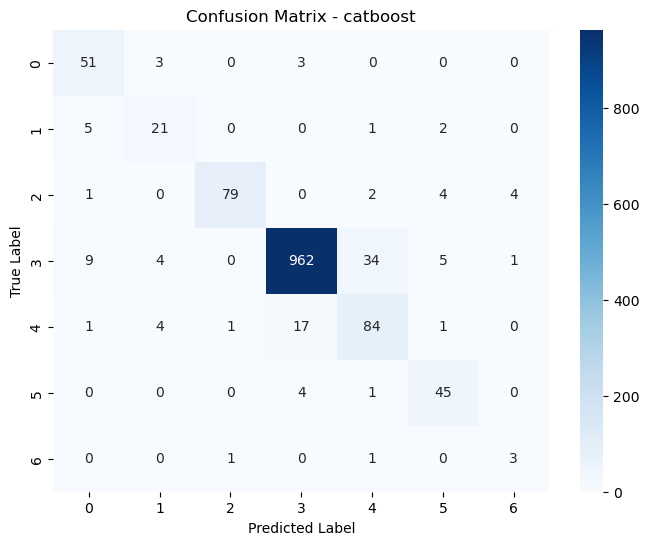

In [162]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - catboost')
plt.show()

# Random Forest 